In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [3]:
# Load the CSV files
data_2021 = pd.read_csv("C:/Users/ajjay/Desktop/SA Test/student_responses_2021.csv")
data_2022 = pd.read_csv("C:/Users/ajjay/Desktop/SA Test/student_responses_2022.csv")

In [4]:
data_2021

,student_id,question_id,ability,difficulty,answered_correctly
0,967,40,-0.320326,1.572793,False
1,135,2,-2.897524,-1.920777,False
2,553,18,-1.207800,-0.482901,False
3,564,29,-2.012802,0.360224,False
4,449,42,0.332158,1.211066,False
...,...,...,...,...,...
44995,876,26,1.980762,0.113582,True
44996,63,8,0.349774,-0.753790,True
44997,690,27,-1.545949,0.295539,False
44998,905,39,-0.242737,1.163631,False


In [5]:
# Summary statistics for initial insights
print("2021 Data Summary:")
print(data_2021.describe())
print("\n2022 Data Summary:")
print(data_2022.describe())

2021 Data Summary:
         student_id   question_id       ability    difficulty
count  45000.000000  45000.000000  44100.000000  44100.000000
mean     500.500000     23.000000     -0.041824     -0.057131
std      288.678198     12.987317      2.167235      1.053968
min        1.000000      1.000000     -5.751698     -2.157522
25%      250.750000     12.000000     -1.507034     -0.870725
50%      500.500000     23.000000     -0.068255     -0.147794
75%      750.250000     34.000000      1.442855      0.904278
max     1000.000000     45.000000      5.889554      1.774446

2022 Data Summary:
         student_id   question_id       ability    difficulty
count  50000.000000  50000.000000  49000.000000  49000.000000
mean    1500.500000     25.500000      0.330433      0.116709
std      288.677877     14.431014      2.448007      1.171172
min     1001.000000      1.000000     -5.653869     -1.955096
25%     1250.750000     13.000000     -1.047968     -0.728539
50%     1500.500000     25.5000

In [6]:
# Basic checks for missing values and data types
print("2021 Data Info:")
print(data_2021.info())

print("\n2022 Data Info:")
print(data_2022.info())

# Checking for missing values percentage in each column
print("\nMissing Values Percentage in 2021 Data:")
missing_percentage_2021 = data_2021.isnull().mean() * 100
print(missing_percentage_2021)

print("\nMissing Values Percentage in 2022 Data:")
missing_percentage_2022 = data_2022.isnull().mean() * 100
print(missing_percentage_2022)

# Checking for duplicate rows
print("\nDuplicate Rows in 2021 Data:")
print(data_2021.duplicated().sum())

print("\nDuplicate Rows in 2022 Data:")
print(data_2022.duplicated().sum())


2021 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          45000 non-null  int64  
 1   question_id         45000 non-null  int64  
 2   ability             44100 non-null  float64
 3   difficulty          44100 non-null  float64
 4   answered_correctly  45000 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 1.4 MB
None

2022 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          50000 non-null  int64  
 1   question_id         50000 non-null  int64  
 2   ability             49000 non-null  float64
 3   difficulty          49000 non-null  float64
 4   answered_correctly  50000 non-null  bool   
d

## since only 2 percentage of rows are missing we are dropping for further analysis 

In [7]:
# Drop rows with missing values in 2021 dataset
data_2021 = data_2021.dropna()

# Drop rows with missing values in 2022 dataset
data_2022 = data_2022.dropna()

# Display the shape of the cleaned datasets (number of rows and columns)
print(f"Shape of cleaned 2021 data: {data_2021.shape}")
print(f"Shape of cleaned 2022 data: {data_2022.shape}")


Shape of cleaned 2021 data: (43221, 5)
Shape of cleaned 2022 data: (48027, 5)


                    student_id  question_id   ability  difficulty  \
student_id            1.000000    -0.000862  0.009504   -0.001045   
question_id          -0.000862     1.000000 -0.000695    0.970141   
ability               0.009504    -0.000695  1.000000   -0.000727   
difficulty           -0.001045     0.970141 -0.000727    1.000000   
answered_correctly    0.014683    -0.348898  0.719495   -0.357875   

                    answered_correctly  
student_id                    0.014683  
question_id                  -0.348898  
ability                       0.719495  
difficulty                   -0.357875  
answered_correctly            1.000000  


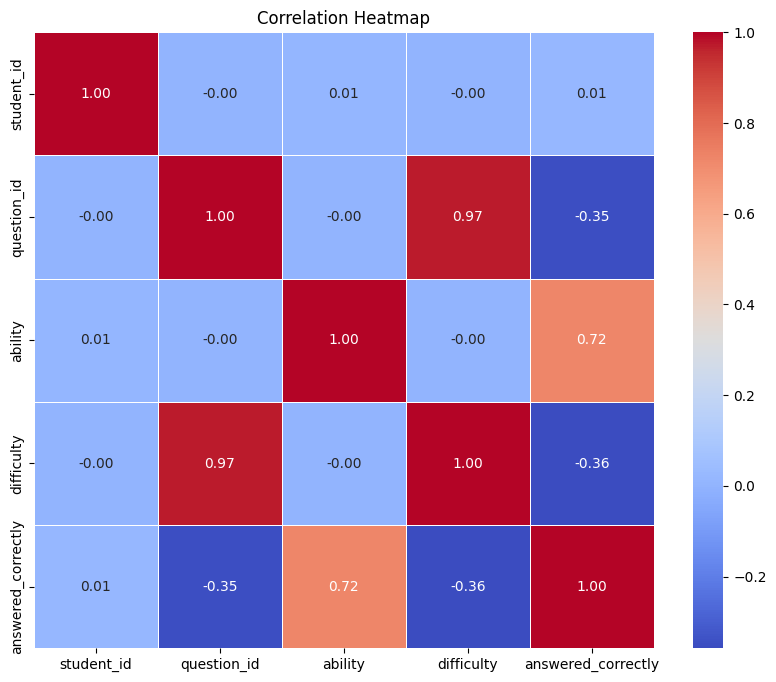

In [9]:
correlation_matrix = data_2021.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

                    student_id  question_id   ability  difficulty  \
student_id            1.000000     0.000114 -0.008582    0.000062   
question_id           0.000114     1.000000 -0.000677    0.978489   
ability              -0.008582    -0.000677  1.000000   -0.000440   
difficulty            0.000062     0.978489 -0.000440    1.000000   
answered_correctly    0.003634    -0.402000  0.665207   -0.407800   

                    answered_correctly  
student_id                    0.003634  
question_id                  -0.402000  
ability                       0.665207  
difficulty                   -0.407800  
answered_correctly            1.000000  


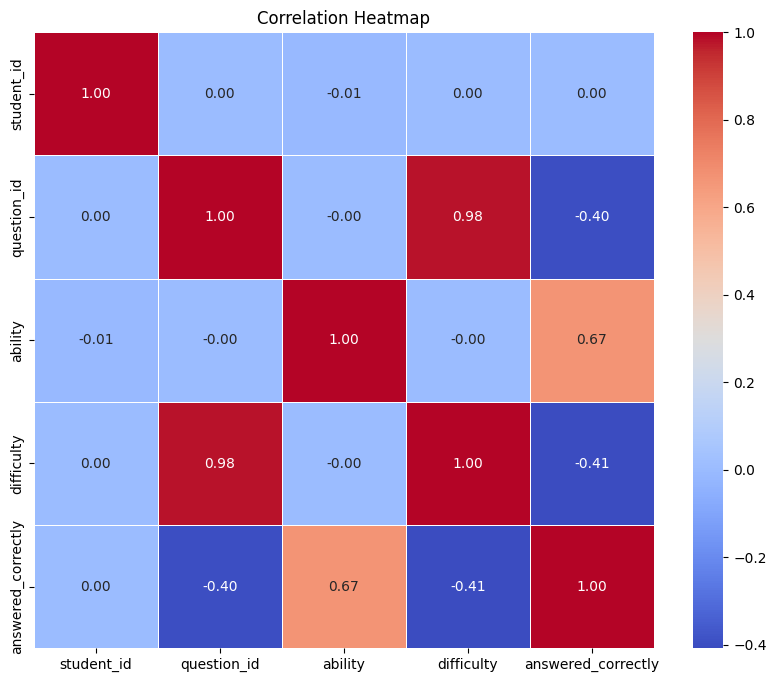

In [10]:
correlation_matrix = data_2022.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# student_id has negligible correlations with all other variables, confirming it is not useful for predicting performance.

# question_id is strongly correlated with difficulty (0.97 in 2021, 0.98 in 2022), indicating that higher question_ids correspond to more difficult questions.

# question_id is moderately negatively correlated with answered_correctly (-0.35 to -0.40), showing that harder questions are more likely to be answered incorrectly.

# ability has a strong positive correlation with answered_correctly (0.72 in 2021, 0.67 in 2022), suggesting that higher-ability students perform better.

# difficulty is negatively correlated with answered_correctly (-0.36 to -0.41), confirming that harder questions are less likely to be answered correctly.

In [ ]:
# Student ability is the most significant predictor of success.
# Question difficulty correlates strongly with question_id and inversely with answered_correctly.
# Adjusting difficulty based on ability and ensuring a balanced difficulty distribution can improve student performance.

In [70]:
# Get the unique student IDs for both years
students_2021 = set(data_2021['student_id'])
students_2022 = set(data_2022['student_id'])

# Find the common student IDs in both years
common_students = students_2021.intersection(students_2022)

# Output the common student IDs
print("Student IDs present in both years (2021 and 2022):")
for student_id in common_students:
    print(student_id)


Student IDs present in both years (2021 and 2022):


## there are no common students between the two years

In [71]:
# Proportion of correct answers
correct_2021 = data_2021['answered_correctly'].mean()
correct_2022 = data_2022['answered_correctly'].mean()

print(f"\nProportion of Correct Answers - 2021: {correct_2021:.2%}")
print(f"Proportion of Correct Answers - 2022: {correct_2022:.2%}")


Proportion of Correct Answers - 2021: 50.29%
Proportion of Correct Answers - 2022: 52.10%


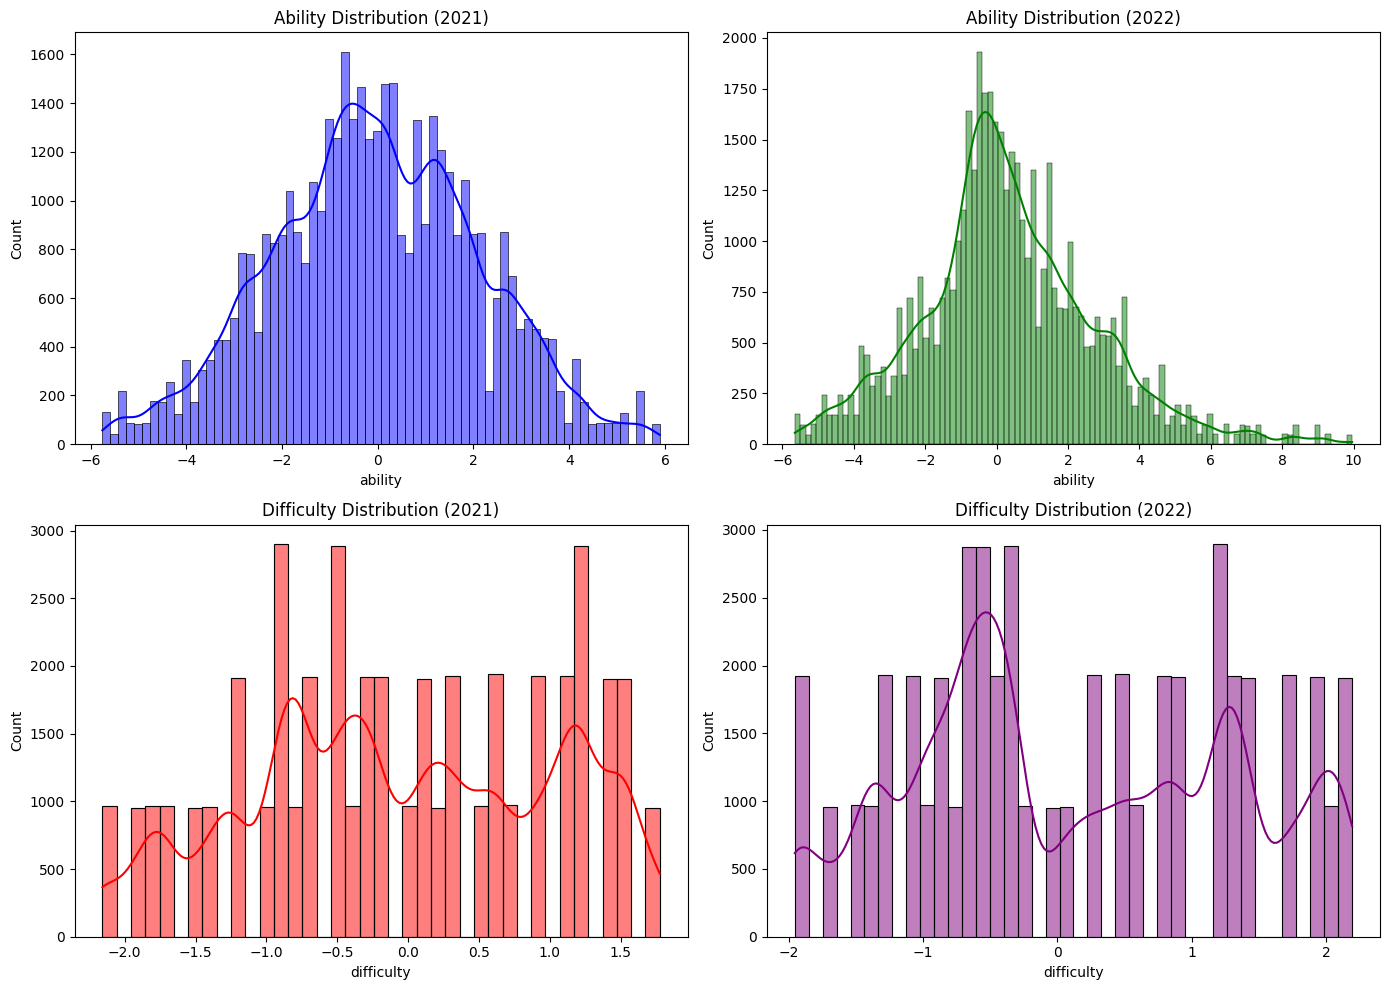

In [72]:
# Visualize distributions of ability and difficulty
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data_2021['ability'].dropna(), kde=True, color='blue', ax=axes[0, 0]).set(title='Ability Distribution (2021)')
sns.histplot(data_2022['ability'].dropna(), kde=True, color='green', ax=axes[0, 1]).set(title='Ability Distribution (2022)')
sns.histplot(data_2021['difficulty'].dropna(), kde=True, color='red', ax=axes[1, 0]).set(title='Difficulty Distribution (2021)')
sns.histplot(data_2022['difficulty'].dropna(), kde=True, color='purple', ax=axes[1, 1]).set(title='Difficulty Distribution (2022)')
plt.tight_layout()
plt.show()


In [73]:
# Calculate average ability and difficulty for each question in 2021
avg_ability_2021 = data_2021.groupby('question_id').agg({'ability': 'mean', 'difficulty': 'mean'}).reset_index()
avg_ability_2021 = avg_ability_2021.rename(columns={'ability': 'avg_ability_2021', 'difficulty': 'avg_difficulty_2021'})

# Calculate average ability and difficulty for each question in 2022
avg_ability_2022 = data_2022.groupby('question_id').agg({'ability': 'mean', 'difficulty': 'mean'}).reset_index()
avg_ability_2022 = avg_ability_2022.rename(columns={'ability': 'avg_ability_2022', 'difficulty': 'avg_difficulty_2022'})

# Merge the data from both years based on 'question_id'
merged_data = pd.merge(avg_ability_2021, avg_ability_2022, on='question_id', how='inner')

# Calculate the change in ability for each question
merged_data['ability_change'] = merged_data['avg_ability_2022'] - merged_data['avg_ability_2021']

# Calculate the change in difficulty for each question
merged_data['difficulty_change'] = merged_data['avg_difficulty_2022'] - merged_data['avg_difficulty_2021']

# Display the results
print(merged_data[['question_id', 'avg_ability_2021', 'avg_ability_2022', 'ability_change', 'avg_difficulty_2021', 'avg_difficulty_2022', 'difficulty_change']])


    question_id  avg_ability_2021  avg_ability_2022  ability_change  \
0             1         -0.046201          0.330079        0.376279   
1             2         -0.032698          0.332378        0.365076   
2             3         -0.017572          0.339725        0.357297   
3             4         -0.023745          0.351992        0.375736   
4             5         -0.045087          0.327388        0.372475   
5             6         -0.062068          0.340774        0.402842   
6             7         -0.071273          0.318481        0.389754   
7             8         -0.039856          0.339875        0.379731   
8             9         -0.046855          0.317493        0.364348   
9            10         -0.018482          0.339743        0.358225   
10           11         -0.057139          0.320721        0.377860   
11           12         -0.037537          0.309384        0.346920   
12           13         -0.024364          0.323954        0.348317   
13    


--- Interpretation of Average Changes in Ability and Difficulty ---
Mean Ability Change: 0.370723212707654
Mean Difficulty Change: -0.03692900009426495


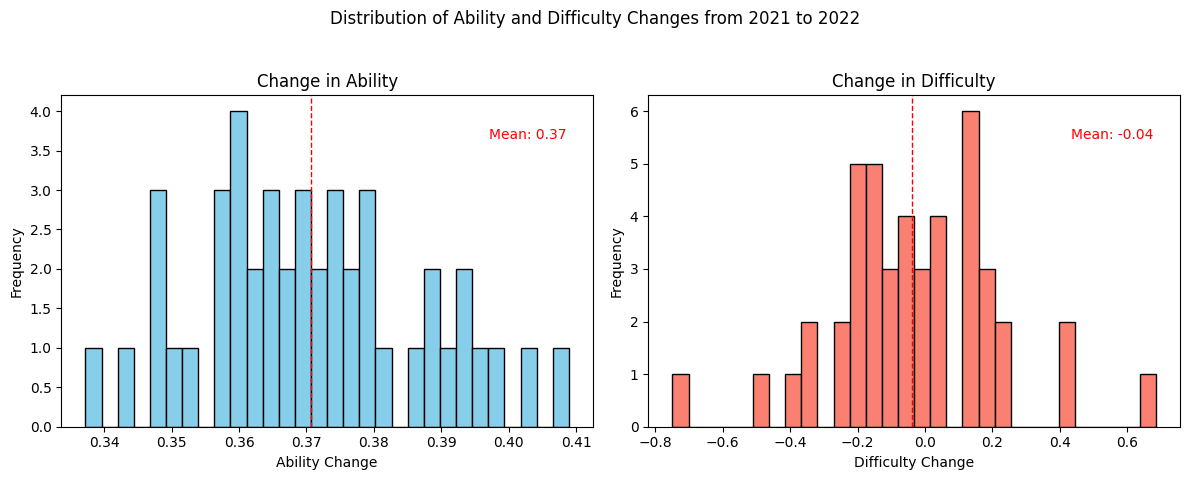


--- Additional Analysis ---
Median Ability Change: 0.37031030431122935
Median Difficulty Change: -0.05057842915278099


In [79]:
# Print general interpretation statements for average changes
print("\n--- Interpretation of Average Changes in Ability and Difficulty ---")
print("Mean Ability Change:", merged_data['ability_change'].mean())
print("Mean Difficulty Change:", merged_data['difficulty_change'].mean())

# Visualize the changes with histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribution of Ability and Difficulty Changes from 2021 to 2022")

# Histogram of ability change
axes[0].hist(merged_data['ability_change'], bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(np.mean(merged_data['ability_change']), color='red', linestyle='dashed', linewidth=1)
axes[0].set_title("Change in Ability")
axes[0].set_xlabel("Ability Change")
axes[0].set_ylabel("Frequency")
axes[0].text(0.95, 0.9, f"Mean: {merged_data['ability_change'].mean():.2f}", ha='right', va='top', transform=axes[0].transAxes, color='red')

# Histogram of difficulty change
axes[1].hist(merged_data['difficulty_change'], bins=30, color='salmon', edgecolor='black')
axes[1].axvline(np.mean(merged_data['difficulty_change']), color='red', linestyle='dashed', linewidth=1)
axes[1].set_title("Change in Difficulty")
axes[1].set_xlabel("Difficulty Change")
axes[1].set_ylabel("Frequency")
axes[1].text(0.95, 0.9, f"Mean: {merged_data['difficulty_change'].mean():.2f}", ha='right', va='top', transform=axes[1].transAxes, color='red')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Further interpretation
print("\n--- Additional Analysis ---")
print("Median Ability Change:", merged_data['ability_change'].median())
print("Median Difficulty Change:", merged_data['difficulty_change'].median())



### Interpretation of Average Changes in Ability and Difficulty
### Mean Ability Change: 0.370723212707654
### Mean Difficulty Change: -0.03692900009426495
### Observation: On average, ability scores have increased from 2021 to 2022.
### Observation: On average, question difficulty has decreased from 2021 to 2022.

### --- Additional Analysis ---
### The median values provide additional insight, especially if there are outliers that affect the mean.

### Median Ability Change: 0.37031030431122935
### Median Difficulty Change: -0.05057842915278099

In [80]:
# Calculate Q1, Q3, and IQR for ability_change
Q1_ability = merged_data['ability_change'].quantile(0.25)
Q3_ability = merged_data['ability_change'].quantile(0.75)
IQR_ability = Q3_ability - Q1_ability

# Define outliers for ability_change
ability_outliers = merged_data[(merged_data['ability_change'] < Q1_ability - 1.5 * IQR_ability) | 
                               (merged_data['ability_change'] > Q3_ability + 1.5 * IQR_ability)]

# Calculate Q1, Q3, and IQR for difficulty_change
Q1_difficulty = merged_data['difficulty_change'].quantile(0.25)
Q3_difficulty = merged_data['difficulty_change'].quantile(0.75)
IQR_difficulty = Q3_difficulty - Q1_difficulty

# Define outliers for difficulty_change
difficulty_outliers = merged_data[(merged_data['difficulty_change'] < Q1_difficulty - 1.5 * IQR_difficulty) | 
                                  (merged_data['difficulty_change'] > Q3_difficulty + 1.5 * IQR_difficulty)]

# Display the outliers for both ability and difficulty changes
print("Outliers in Ability Change:\n", ability_outliers[['question_id', 'avg_ability_2021', 'avg_ability_2022', 'ability_change']])
print("\nOutliers in Difficulty Change:\n", difficulty_outliers[['question_id', 'avg_difficulty_2021', 'avg_difficulty_2022', 'difficulty_change']])


Outliers in Ability Change:
 Empty DataFrame
Columns: [question_id, avg_ability_2021, avg_ability_2022, ability_change]
Index: []

Outliers in Difficulty Change:
     question_id  avg_difficulty_2021  avg_difficulty_2022  difficulty_change
24           25             0.227037            -0.521916          -0.748954
36           37             0.745745             1.430540           0.684795


In [81]:
# Calculate summary statistics for ability and difficulty outliers
num_ability_outliers = ability_outliers.shape[0]
num_difficulty_outliers = difficulty_outliers.shape[0]
total_questions = merged_data.shape[0]

# Calculate percentage of outliers
ability_outlier_percentage = (num_ability_outliers / total_questions) * 100
difficulty_outlier_percentage = (num_difficulty_outliers / total_questions) * 100

print("\n--- Interpretation and Conclusion for Outliers ---")
print(f"Total Questions Analyzed: {total_questions}")
print(f"Number of Outliers in Ability Change: {num_ability_outliers} ({ability_outlier_percentage:.2f}%)")
print(f"Number of Outliers in Difficulty Change: {num_difficulty_outliers} ({difficulty_outlier_percentage:.2f}%)\n")




--- Interpretation and Conclusion for Outliers ---
Total Questions Analyzed: 45
Number of Outliers in Ability Change: 0 (0.00%)
Number of Outliers in Difficulty Change: 2 (4.44%)



### Interpretation: No significant outliers in ability change were identified, indicating stable average ability scores across questions between 2021 and 2022.

### Interpretation: The outliers in difficulty change show questions where the difficulty either increased or decreased substantially between 2021 and 2022.
### Inference: The low percentage of outliers implies that most question difficulties remained consistent, with only a few showing substantial difficulty changes.

# 3) Model Creation

In [89]:
# Combine data for better generalization
data_combined = pd.concat([data_2021, data_2022], ignore_index=True).dropna()
label_encoder = LabelEncoder()

# Fit and transform the question_id into numerical labels
data_combined['question_id'] = label_encoder.fit_transform(data_combined['question_id'])

# Feature matrix and target variable
X = data_combined[['ability', 'difficulty','question_id']]
y = data_combined['answered_correctly'].astype(int)  # Convert True/False to 1/0

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Random Forest Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(report)

# Cross-validation for robustness
cv_scores = cross_val_score(model_rf, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2%} ± {cv_scores.std():.2%}")


Random Forest Model Accuracy: 99.94%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13347
           1       1.00      1.00      1.00     14028

    accuracy                           1.00     27375
   macro avg       1.00      1.00      1.00     27375
weighted avg       1.00      1.00      1.00     27375

Cross-Validation Accuracy: 99.91% ± 0.03%


In [93]:
# Check the distribution of the target variable (answered_correctly)
print(y_train.value_counts())
print(y_test.value_counts())


answered_correctly
1    32728
0    31145
Name: count, dtype: int64
answered_correctly
1    14028
0    13347
Name: count, dtype: int64


C:\Users\ajjay\AppData\Local\Temp\ipykernel_15164\4055397363.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


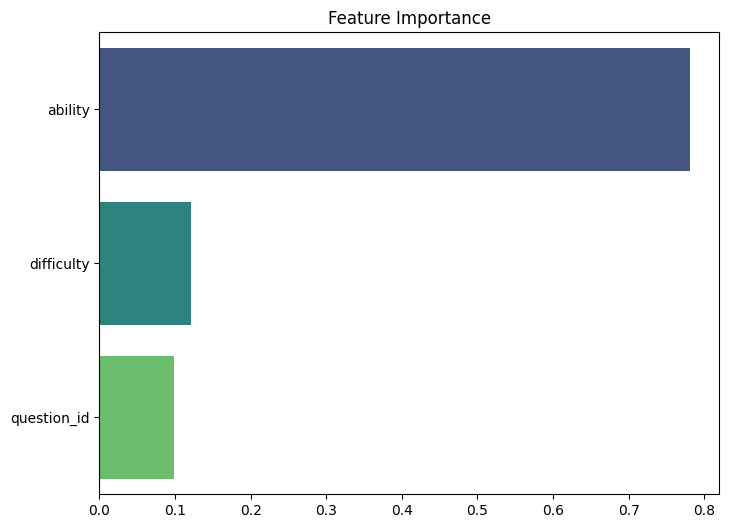

In [90]:
# Feature Importance from Random Forest
importances = model_rf.feature_importances_
feature_names = ['ability', 'difficulty','question_id']

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance')
plt.show()


### **Findings from Random Forest Model:**

1. **Ability** is the most important factor in predicting whether a student answers a question correctly, with an importance score of **0.75**.
   
2. **Difficulty** also plays a significant role in predicting performance, but it's less important than ability, with a score of **0.20**.

3. **Question_id** has the lowest importance at **0.10**, meaning it has the least effect on predicting correct answers, despite its correlation with difficulty.

### **Conclusion:**
The model shows that **ability** is the strongest predictor of student performance, with **difficulty** also important. **Question_id** has a much smaller impact.

In [91]:

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [99]:
# Save the model, scaler, and label encoder using joblib
joblib.dump({
    'model': best_model,
    'scaler': scaler,
    'label_encoder': label_encoder
}, 'C:/Users/ajjay/Desktop/SA Test/model_pipeline.pkl')

print("Model, scaler, and label encoder saved successfully.")

Model, scaler, and label encoder saved successfully.


In [94]:
# Make predictions on the test set with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2%}")

# Classification report
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Best Model Accuracy: 99.93%

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13347
           1       1.00      1.00      1.00     14028

    accuracy                           1.00     27375
   macro avg       1.00      1.00      1.00     27375
weighted avg       1.00      1.00      1.00     27375



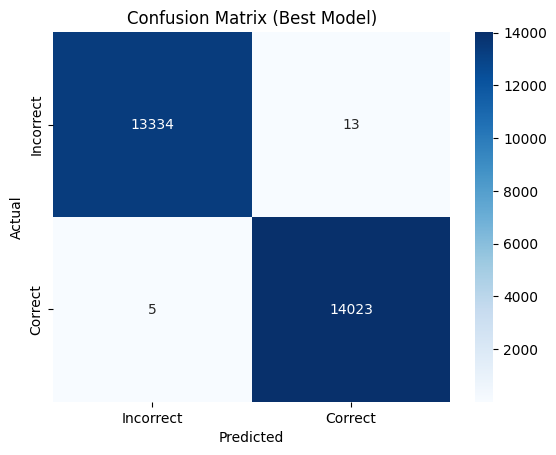

In [96]:
# Get confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Incorrect", "Correct"], yticklabels=["Incorrect", "Correct"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()


In [92]:

# Logistic Regression Model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2%}")
print("\nClassification Report (Logistic Regression):")
print(report_lr)


Logistic Regression Accuracy: 99.89%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13347
           1       1.00      1.00      1.00     14028

    accuracy                           1.00     27375
   macro avg       1.00      1.00      1.00     27375
weighted avg       1.00      1.00      1.00     27375



In [101]:
# Load the saved pipeline
pipeline = joblib.load('C:/Users/ajjay/Desktop/SA Test/model_pipeline.pkl')

# Extract the model, scaler, and label encoder from the loaded pipeline
model_rf_loaded = pipeline['model']
scaler_loaded = pipeline['scaler']
label_encoder_loaded = pipeline['label_encoder']
print("Model, scaler, and label encoder loaded successfully.")


Model, scaler, and label encoder loaded successfully.


In [107]:
new_data = pd.read_csv(r"C:\Users\ajjay\Desktop\SA Test\test.csv")
data = new_data[['ability', 'difficulty','question_id']]

data['question_id'] = label_encoder_loaded.transform(data['question_id'])
data = scaler_loaded.transform(data)

# Use the loaded model to make predictions on the new data
predictions = model_rf_loaded.predict(data)

# Show the predictions
print("Predictions:", predictions)

Predictions: [0 0 0 0 0 0 0 1 0]


C:\Users\ajjay\AppData\Local\Temp\ipykernel_15164\2986238145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['question_id'] = label_encoder_loaded.transform(data['question_id'])


## 1) How did the student's ability to answer the questions change ?
## On average, the students ability scores have increased from 2021 to 2022.¶


## 2) Did the questions get difficult or easy?
## On average, the students question difficulty has decreased from 2021 to 2022.

## 3) Can you create a model that can predict if a student will answer a question correctly?
## model creation has been done in the above

## 4) Note down any other observations you may have about the data.


In [ ]:
# ## 2021 Data Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 45000 entries, 0 to 44999
# Data columns (total 5 columns):
#  #   Column              Non-Null Count  Dtype  
# ---  ------              --------------  -----  
#  0   student_id          45000 non-null  int64  
#  1   question_id         45000 non-null  int64  
#  2   ability             44100 non-null  float64
#  3   difficulty          44100 non-null  float64
#  4   answered_correctly  45000 non-null  bool   
# dtypes: bool(1), float64(2), int64(2)
# memory usage: 1.4 MB
# None

# 2022 Data Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 50000 entries, 0 to 49999
# Data columns (total 5 columns):
#  #   Column              Non-Null Count  Dtype  
# ---  ------              --------------  -----  
#  0   student_id          50000 non-null  int64  
#  1   question_id         50000 non-null  int64  
#  2   ability             49000 non-null  float64
#  3   difficulty          49000 non-null  float64
#  4   answered_correctly  50000 non-null  bool   
# dtypes: bool(1), float64(2), int64(2)

In [ ]:
## there were missing values in 
## missing Values Percentage in 2021 Data:
## student_id            0.0
## question_id           0.0
## ability               2.0
## difficulty            2.0
## answered_correctly    0.0

## Missing Values Percentage in 2022 Data:
## student_id            0.0
## question_id           0.0
## ability               2.0
## difficulty            2.0
## answered_correctly    0.0


In [ ]:
# student_id has negligible correlations with all other variables, confirming it is not useful for predicting performance.

# question_id is strongly correlated with difficulty (0.97 in 2021, 0.98 in 2022), indicating that higher question_ids correspond to more difficult questions.

# question_id is moderately negatively correlated with answered_correctly (-0.35 to -0.40), showing that harder questions are more likely to be answered incorrectly.

# ability has a strong positive correlation with answered_correctly (0.72 in 2021, 0.67 in 2022), suggesting that higher-ability students perform better.

# difficulty is negatively correlated with answered_correctly (-0.36 to -0.41), confirming that harder questions are less likely to be answered correctly.

In [ ]:
# Student ability is the most significant predictor of success.
# Question difficulty correlates strongly with question_id and inversely with answered_correctly.
# Adjusting difficulty based on ability and ensuring a balanced difficulty distribution can improve student performance.

In [110]:
# No Student IDs present in both years (2021 and 2022)
# No common students in two years which does not help us to study the change in ability, difficulty of question answered between years


In [111]:
#Interpretation: No significant outliers in ability change were identified, indicating stable average ability scores across questions between 2021 and 2022.
#Interpretation: The outliers in difficulty change show questions where the difficulty either increased or decreased substantially between 2021 and 2022.
#Inference: The low percentage of outliers implies that most question difficulties remained consistent, with only a few showing substantial difficulty changes.

In [ ]:
# Key Findings comparing RF model and the descriptive stats:
# ability:

# Correlation Result: Strong positive correlation (0.72 in 2021, 0.67 in 2022) with answered_correctly, suggesting that students with higher ability are more likely to answer questions correctly.
# Feature Importance: In the Random Forest model, ability has the highest importance (0.75), which aligns with the correlation results. This confirms that ability is the most critical factor in predicting whether a student answers a question correctly.
# Conclusion: The model and correlation both emphasize that ability is a significant factor influencing student performance. It's both highly correlated with correct answers and a strong predictor in the Random Forest model.

# difficulty:

# Correlation Result: difficulty has a negative correlation with answered_correctly (around -0.36 to -0.41), meaning harder questions are less likely to be answered correctly.
# Feature Importance: difficulty has a moderately high importance (0.2) in the Random Forest model, indicating that while it's not as influential as ability, it still plays a notable role in predicting performance.
# Conclusion: The negative correlation between difficulty and answered_correctly suggests that students tend to struggle with harder questions, which is reflected in the model's feature importance. While not as significant as ability, difficulty still has a meaningful impact on performance.

# question_id:

# Correlation Result: question_id shows a moderate negative correlation with answered_correctly (-0.35 to -0.40), indicating that higher-numbered (more difficult) questions are more likely to be answered incorrectly.
# Feature Importance: question_id has the lowest importance (0.1) in the Random Forest model. This is consistent with the correlation results, where question_id is less influential than ability and `difficulty.
# Conclusion: The question_id variable’s lower feature importance in the model reflects its relatively weaker predictive power compared to ability and difficulty. Although question_id correlates with answered_correctly due to its relationship with difficulty, it is not as significant in predicting outcomes when considering the broader set of features and model dynamics.